# Draw a planetary nebula from basic principles

I asked ChatGPT to help me explain how a planetary nebula works.

Here is the prompt I used:

```
I want to explain that a planetary nebula is basically a projection effect of having a lot of material aligned in the line of sight in my newsletter.

For this, I want to attach a Python notebook explaining this. 

I want to make two examples. 
In the first one, I want to show that if there is a circular shell (of external radius 1 and inner radius 0.8), the projection in the y-axis will have more area in the extreme than in the centre. Instead of making integrals, I figure the easiest way to do it would be to take horizontal lines and "measure" how long is a horizontal line inside the shell as a function of distance from the centre.

In the second example, I want to take the circular shell "face on" and show that if I project it (or, which is the same, I measure how much space is in the shell for lines perpendicular to the plot), I get the normal figure of a planetary nebula like the "Ring Nebula".

Can you help me programming this in Python?
```

This generated exaple 1 and 2.

I also asked to visualise the toy model:

```
can you also please add a plot where one can see how a line goes through the shell? like a representation of this toy model?

```

This generated example 1a.

In [13]:
import numpy as np
import matplotlib.pyplot as plt

## Example 1: Horizontal Line Integration

We consider a 2D circular shell with external radius $R_{\mathrm{outer}}=1$ and internal radius $R_{\mathrm{inner}}=0.8$. For each vertical offset $y$, we compute the length of the horizontal line segment that lies within the shell:

- If $|y| \le R_{\mathrm{inner}}$, the line runs from $x=\pm\sqrt{R_{\mathrm{outer}}^2 - y^2}$ and excludes the inner gap from $x=\pm\sqrt{R_{\mathrm{inner}}^2 - y^2}$.  
- If $R_{\mathrm{inner}} < |y| \le R_{\mathrm{outer}}$, the inner gap disappears and the line runs only within the outer circle.

We plot this length as a function of $y$ to see how much material a line of sight crosses.



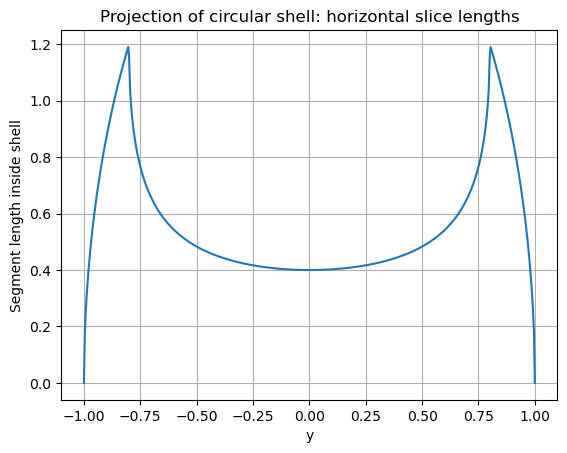

In [14]:
# Define shell radii
t_outer = 1.0
r_inner = 0.8

y = np.linspace(-t_outer, t_outer, 500)
length = []

for yi in y:
    if abs(yi) <= t_outer:
        x_outer = np.sqrt(t_outer**2 - yi**2)
        x_inner = np.sqrt(r_inner**2 - yi**2) if abs(yi) <= r_inner else 0.0
        length.append(2 * (x_outer - x_inner))
    else:
        length.append(0.0)

length = np.array(length)

plt.figure()
plt.plot(y, length)
plt.xlabel('y')
plt.ylabel('Segment length inside shell')
plt.title('Projection of circular shell: horizontal slice lengths')
plt.grid(True)
plt.show()


## Example 1a: Visualizing a Single Line of Sight

To illustrate what a horizontal line of sight actually looks like against the shell, we plot:

- The outer and inner circles.  
- A horizontal line at a chosen $y$ offset.  
- The intersection segment highlighted in red.

Choose, for example, $y=0.9$.

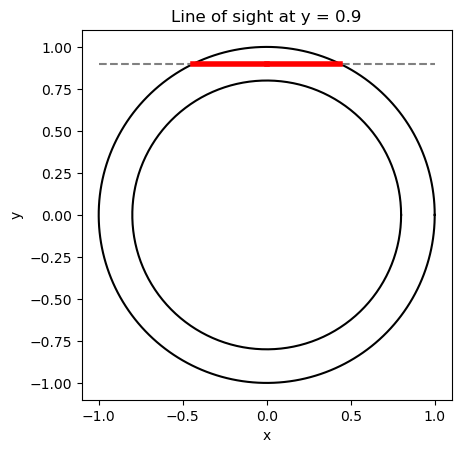

In [18]:
# %%
# Visualization parameters
y0 = 0.9
theta = np.linspace(0, 2*np.pi, 400)

# Circle coordinates
x_outer = np.cos(theta)
y_outer = np.sin(theta)
x_inner = r_inner * np.cos(theta)
y_inner = r_inner * np.sin(theta)

# Compute intersection segment
x_o = np.sqrt(t_outer**2 - y0**2)
x_i = np.sqrt(r_inner**2 - y0**2) if abs(y0) <= r_inner else 0

fig, ax = plt.subplots()
# Plot circles
ax.plot(x_outer, y_outer, 'k')
ax.plot(x_inner, y_inner, 'k')
# Plot line of sight
a_x = np.linspace(-t_outer, t_outer, 500)
ax.plot(a_x, np.full_like(a_x, y0), '--', color='gray')
# Highlight segment
ax.plot([-x_o, -x_i], [y0, y0], '-', linewidth=4, color='red')
ax.plot([x_i, x_o], [y0, y0], '-', linewidth=4, color='red')

ax.set_aspect('equal')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_title(f"Line of sight at y = {y0}")
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## Example 2: Radial Projection (Ring Nebula Analogue)

Next, we project the same shell "face-on".  For each projected radius $r$ in the image plane, the line of sight crosses a segment of the shell:

- If $r \le R_{\mathrm{inner}}$, the LOS crosses both inner and outer surfaces: $2(\sqrt{R_{\mathrm{outer}}^2 - r^2} - \sqrt{R_{\mathrm{inner}}^2 - r^2})$.  
- If $R_{\mathrm{inner}} < r \le R_{\mathrm{outer}}$, the LOS only crosses the outer surface: $2\sqrt{R_{\mathrm{outer}}^2 - r^2}$.  
- Otherwise the brightness is zero.

We first plot the 1D radial brightness profile, and then construct a 2D image to visualize the ring structure.


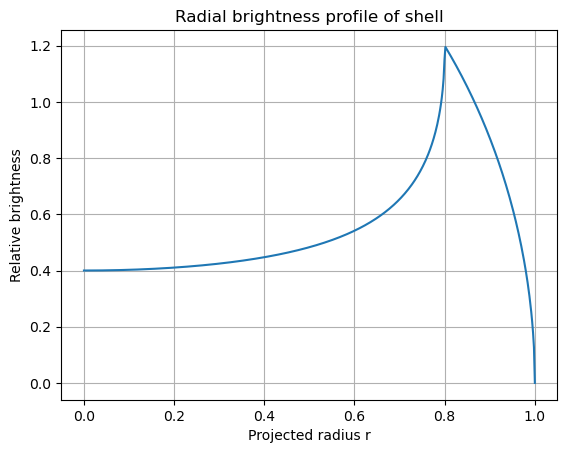

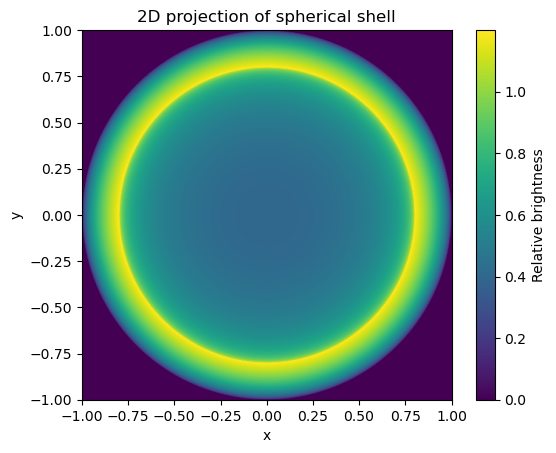

In [16]:
# %%
# Radial brightness profile
r = np.linspace(0, t_outer, 500)
brightness = []

for ri in r:
    if ri <= r_inner:
        brightness.append(2 * (np.sqrt(t_outer**2 - ri**2) - np.sqrt(r_inner**2 - ri**2)))
    elif ri <= t_outer:
        brightness.append(2 * np.sqrt(t_outer**2 - ri**2))
    else:
        brightness.append(0.0)

brightness = np.array(brightness)

plt.figure()
plt.plot(r, brightness)
plt.xlabel('Projected radius r')
plt.ylabel('Relative brightness')
plt.title('Radial brightness profile of shell')
plt.grid(True)
plt.show()

# %%
# 2D projection image
grid_size = 500
x = np.linspace(-t_outer, t_outer, grid_size)
X, Y = np.meshgrid(x, x)
R = np.sqrt(X**2 + Y**2)
Z = np.zeros_like(R)

# Compute brightness at each pixel
mask_outer = R <= t_outer
mask_inner = R <= r_inner
Z[mask_outer] = 2 * np.sqrt(t_outer**2 - R[mask_outer]**2)
Z[mask_inner] = 2 * (np.sqrt(t_outer**2 - R[mask_inner]**2) - np.sqrt(r_inner**2 - R[mask_inner]**2))

plt.figure()
plt.imshow(Z, origin='lower', extent=[-t_outer, t_outer, -t_outer, t_outer])
plt.colorbar(label='Relative brightness')
plt.title('2D projection of spherical shell')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
